In [1]:
import PyPlot as plt;
include("..//src//GradientLimitPDE.jl");
using Main.GradientLimitPDEModule;

In [2]:
nodal_source_inner = 0.01;
nodal_source_outer = 0.2;
nodal_psi = 1.;
linear_psi = 1.;

In [3]:
inner_boundary::Boundary = createCircleBoundary(20, 0.05, [0.7, 0.5], nodal_source_inner, nodal_psi, linear_psi);
outer_boundary::Boundary = createSquareBoundary(5, 1.0, [0., 0.], nodal_source_outer, nodal_psi, linear_psi);

In [4]:
background_grid::UniformSquareGrid = UniformSquareGrid([0., 0.], 1.0, 512, 0.2);

In [5]:
gradient_limit_pde::GradientLimitPDE = GradientLimitPDE(background_grid, [inner_boundary, outer_boundary]);

In [6]:
@time result = solve(gradient_limit_pde);

  9.628416 seconds (163.13 M allocations: 13.377 GiB, 17.37% gc time, 0.69% compilation time)


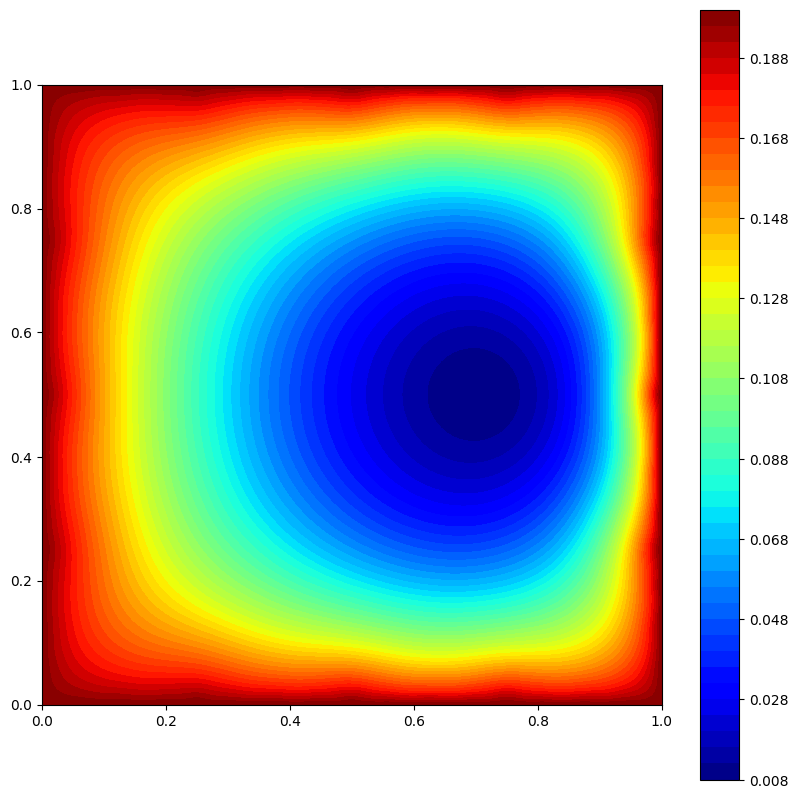

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [7]:
plt.figure(figsize=(10, 10), facecolor="white");
plt.gca().set_aspect("equal");
plt.contourf(background_grid.x_s, background_grid.y_s, result', 50, cmap="jet");
plt.colorbar();
display(plt.gcf());
plt.show();